In [22]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from Backtestingtools.electron_pnl_analyzer import PnLAnalyzer
from Backtestingtools import trade_loader
from Backtestingtools.ticks_and_books_helper import load_ticks_and_books, query_between


In [23]:
df_dict = trade_loader.build_df_dict2('2025,6,1','2025,6,20',strat='capital_neutrino_txf_5f')

Loading fills by day:  30%|███       | 6/20 [00:00<00:00, 27.26it/s]

No data for 2025-06-01
No data for 2025-06-02
No data for 2025-06-07


Loading fills by day:  60%|██████    | 12/20 [00:00<00:00, 28.34it/s]

No data for 2025-06-08
No data for 2025-06-14


Loading fills by day: 100%|██████████| 20/20 [00:00<00:00, 28.98it/s]

No data for 2025-06-15


In [24]:
df_dict_day = trade_loader.build_df_dict_day('2025,6,1','2025,6,20',strat='capital_neutrino_txf')

Loading fills by day:   0%|          | 0/20 [00:00<?, ?it/s]

No data for 2025-06-01


Loading fills by day:  55%|█████▌    | 11/20 [00:00<00:00, 53.68it/s]

No data for 2025-06-07
No data for 2025-06-08
No data for 2025-06-11


Loading fills by day:  85%|████████▌ | 17/20 [00:00<00:00, 54.83it/s]

No data for 2025-06-14
No data for 2025-06-15


Loading fills by day: 100%|██████████| 20/20 [00:00<00:00, 53.98it/s]


In [25]:
# PnLAnalyzer
analyzer = PnLAnalyzer(df_dict)
# carry + pnl
analyzer2 =  PnLAnalyzer(df_dict_day)

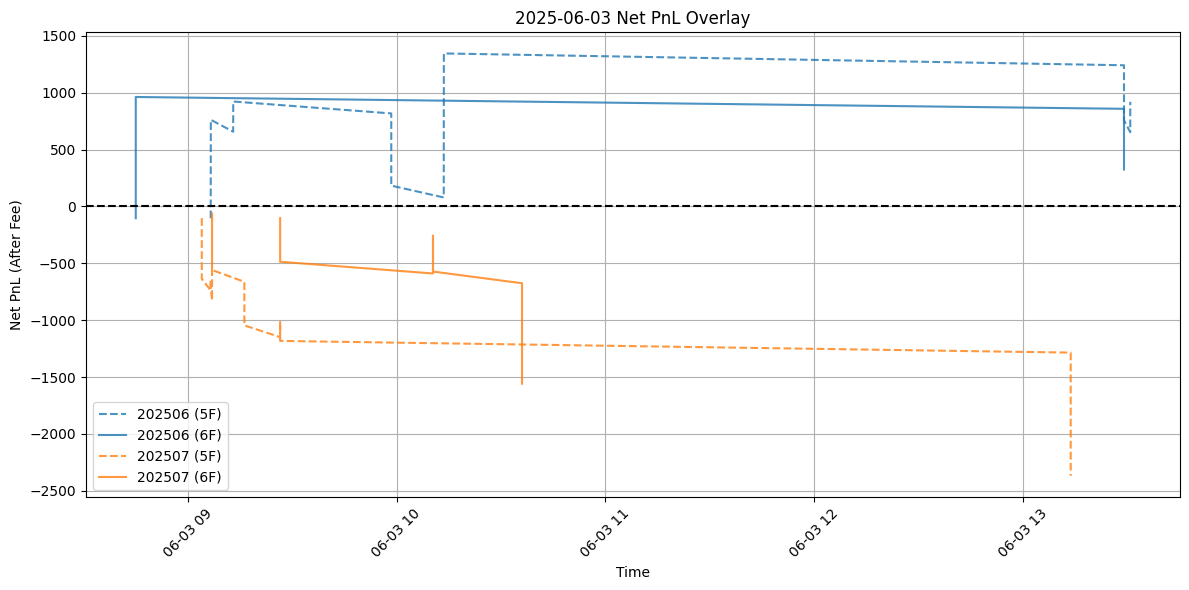

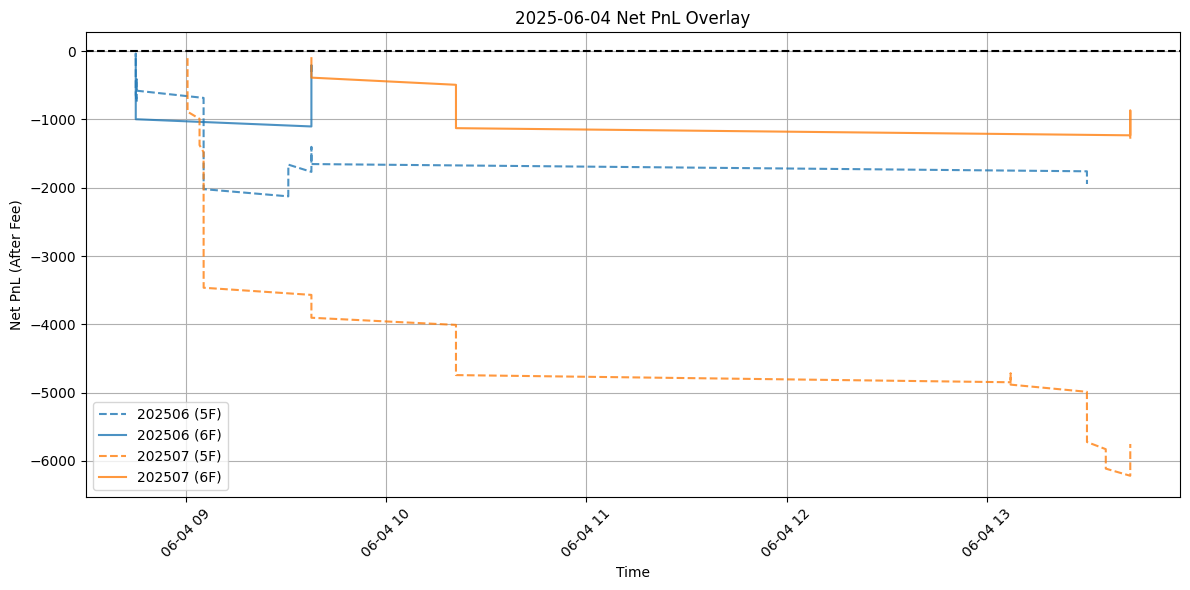

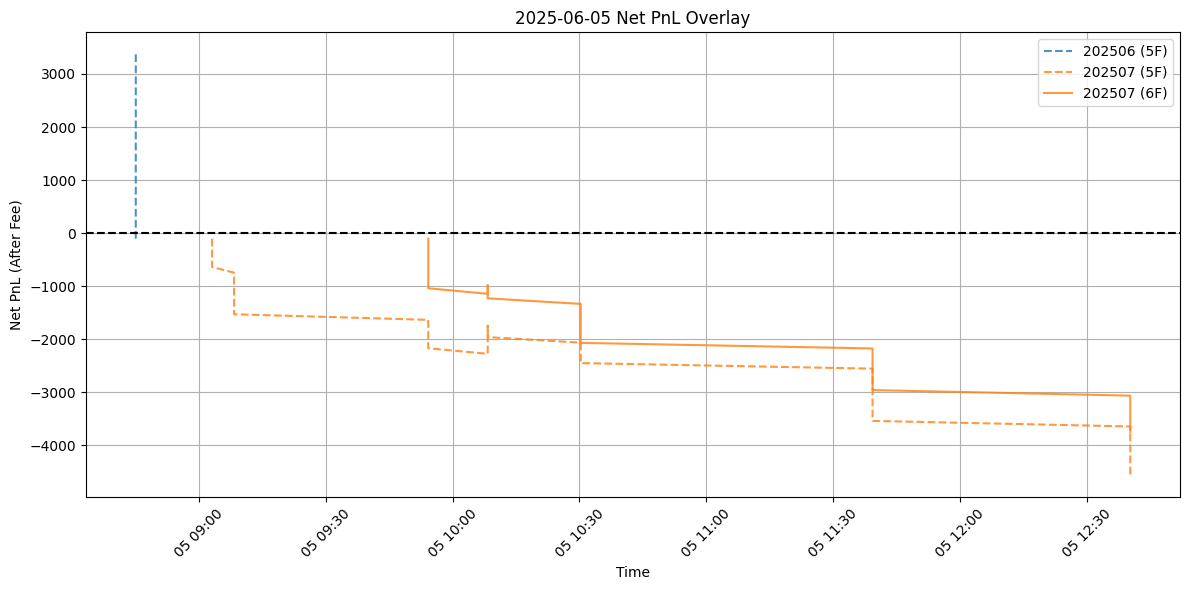

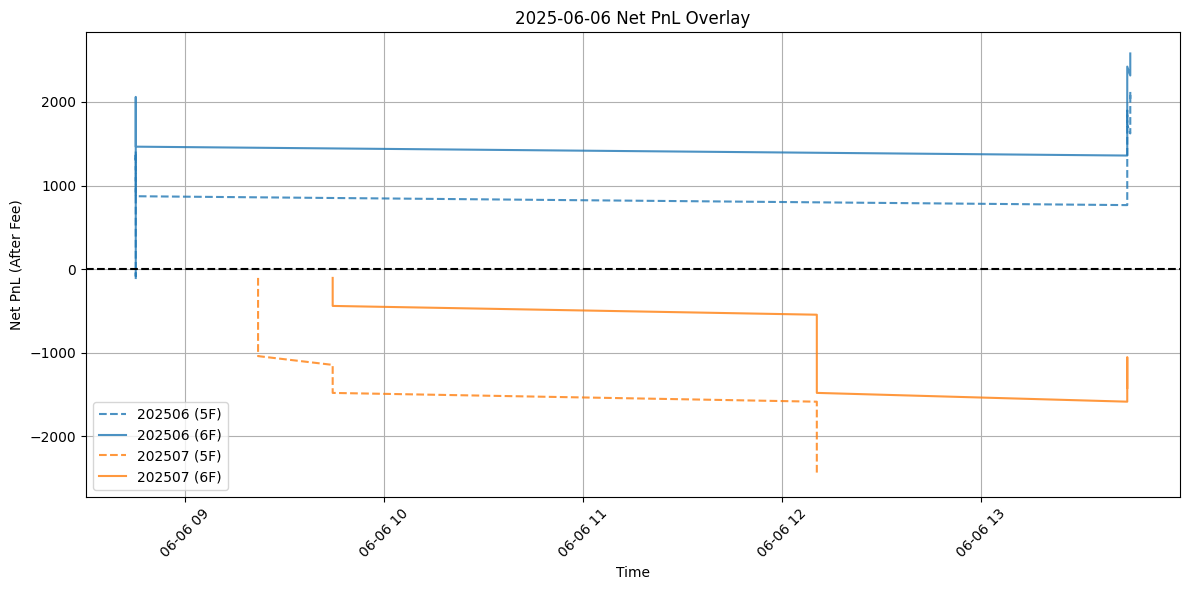

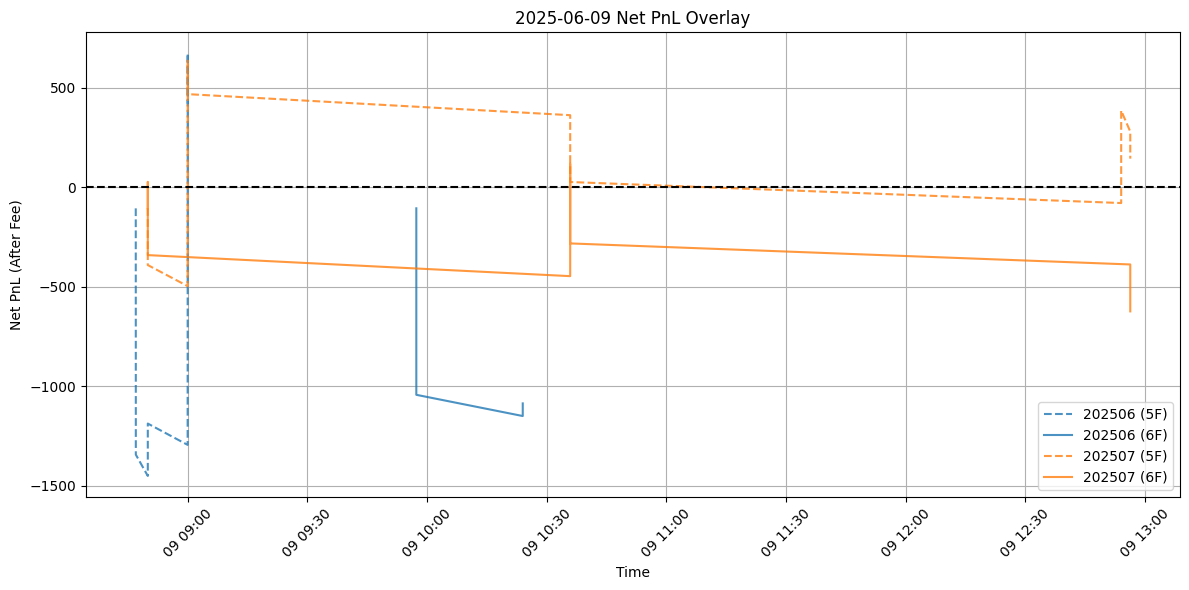

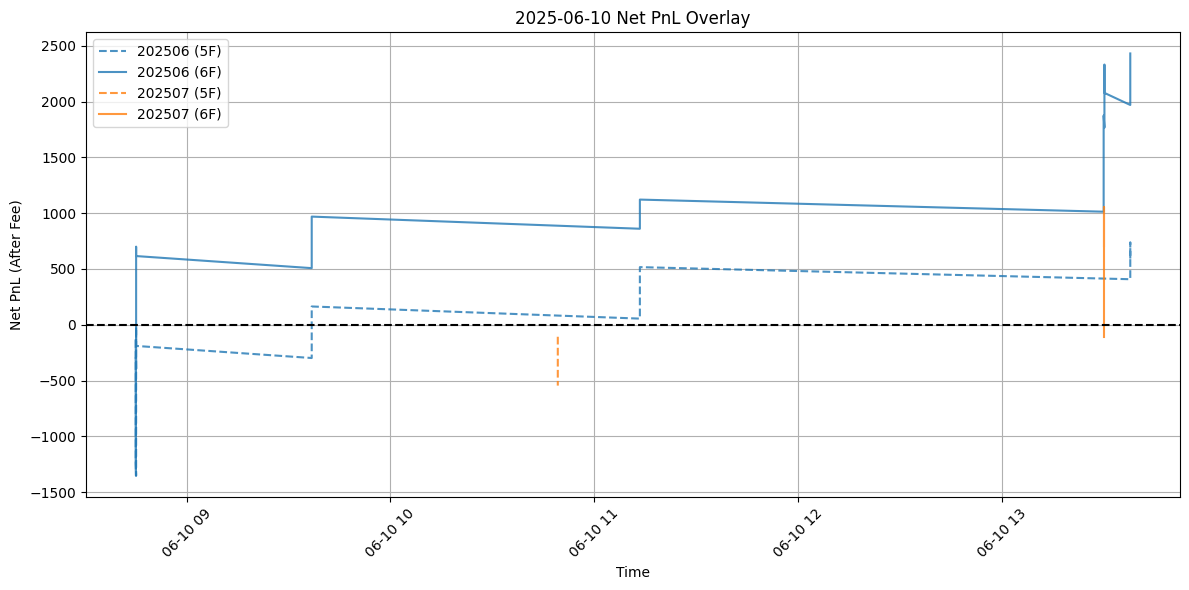

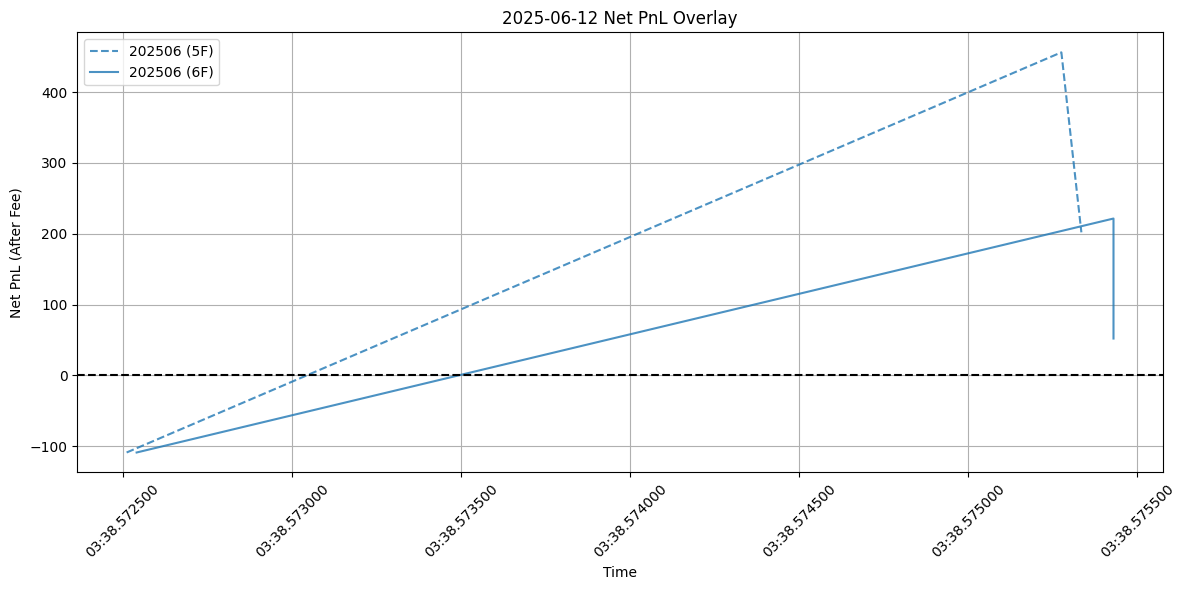

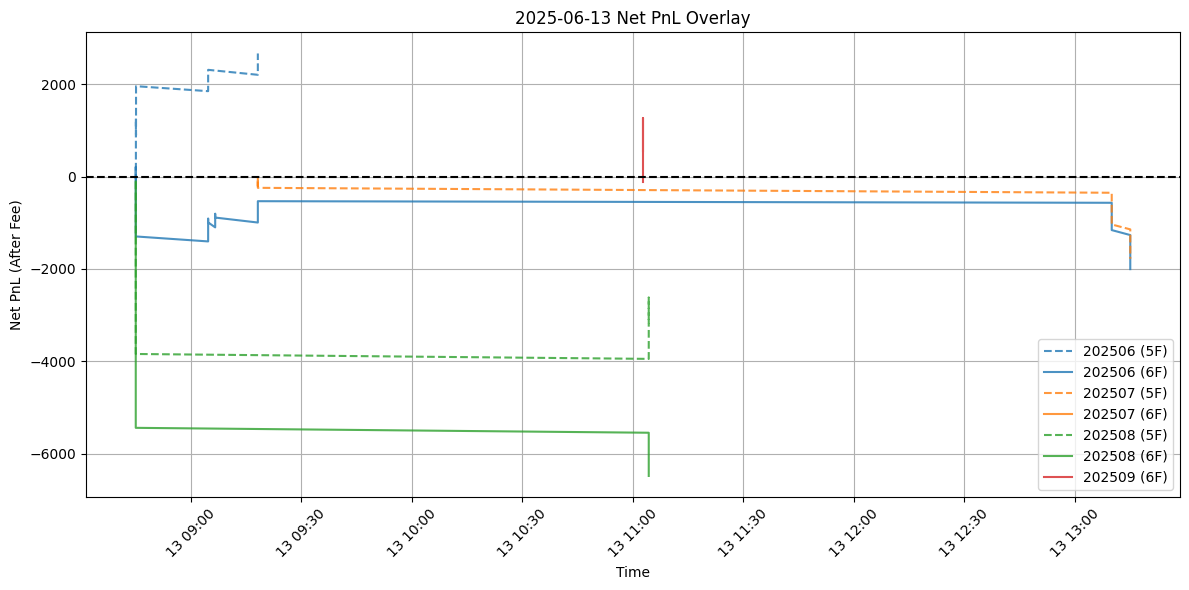

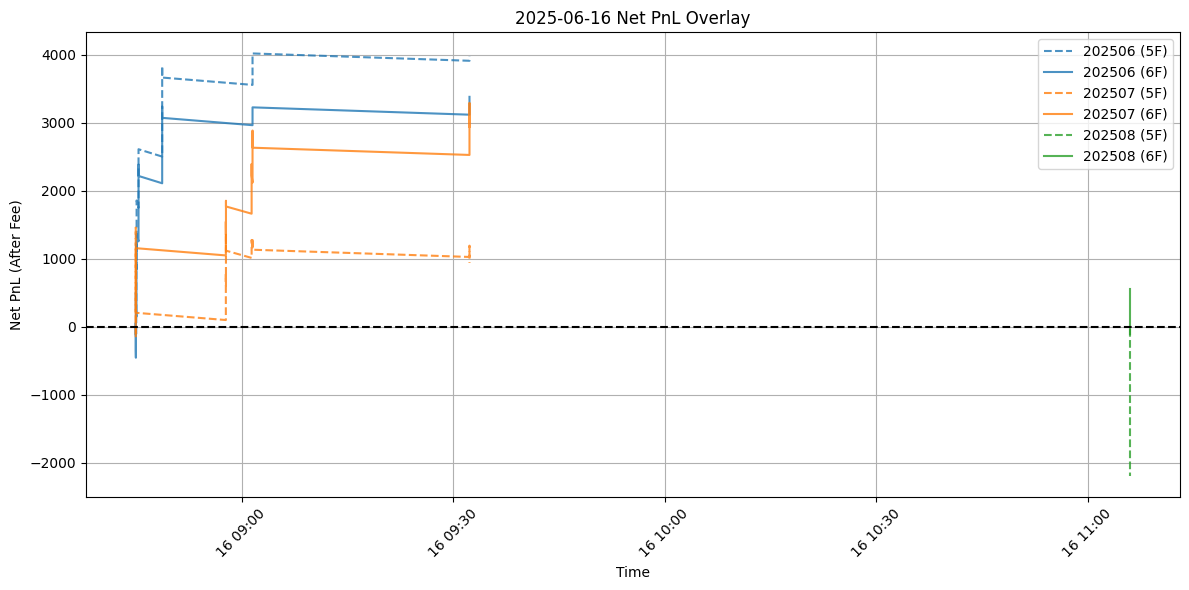

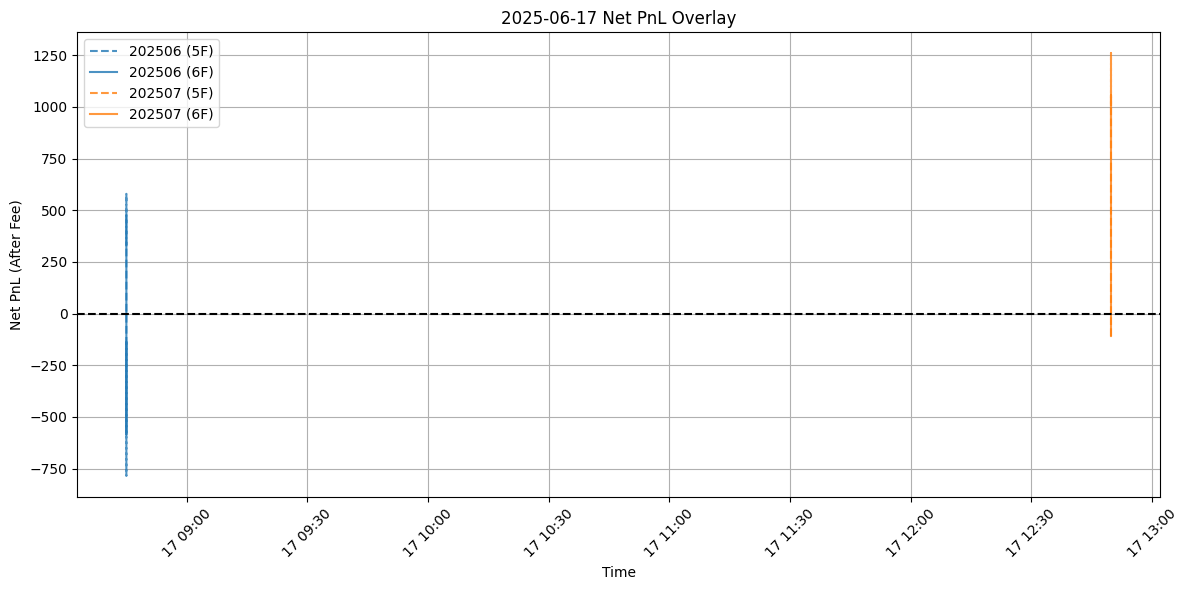

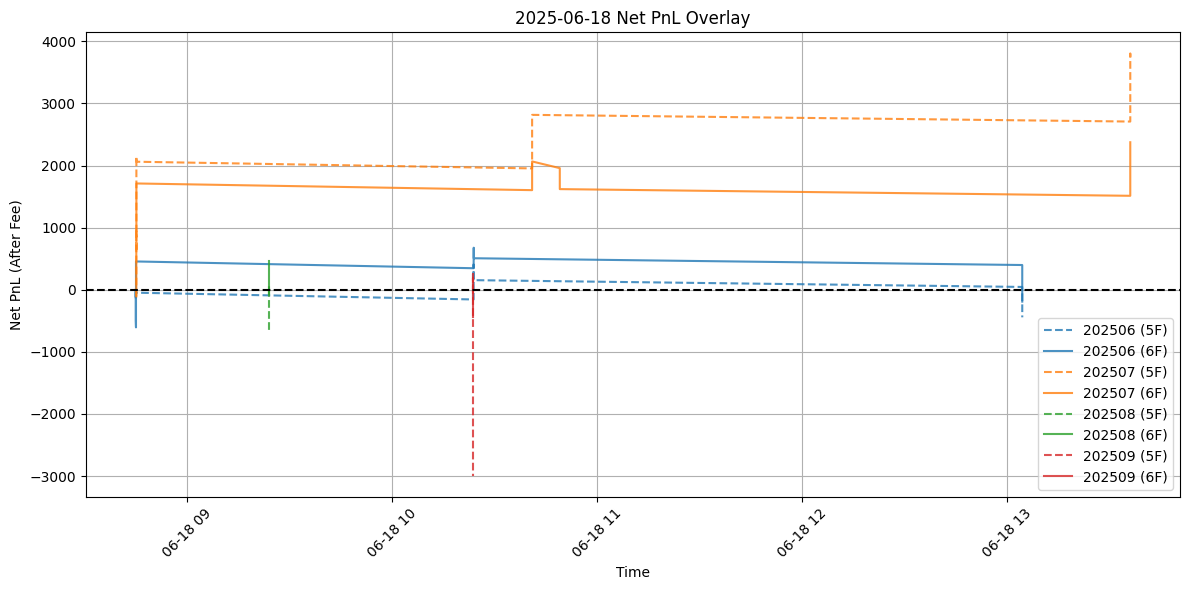

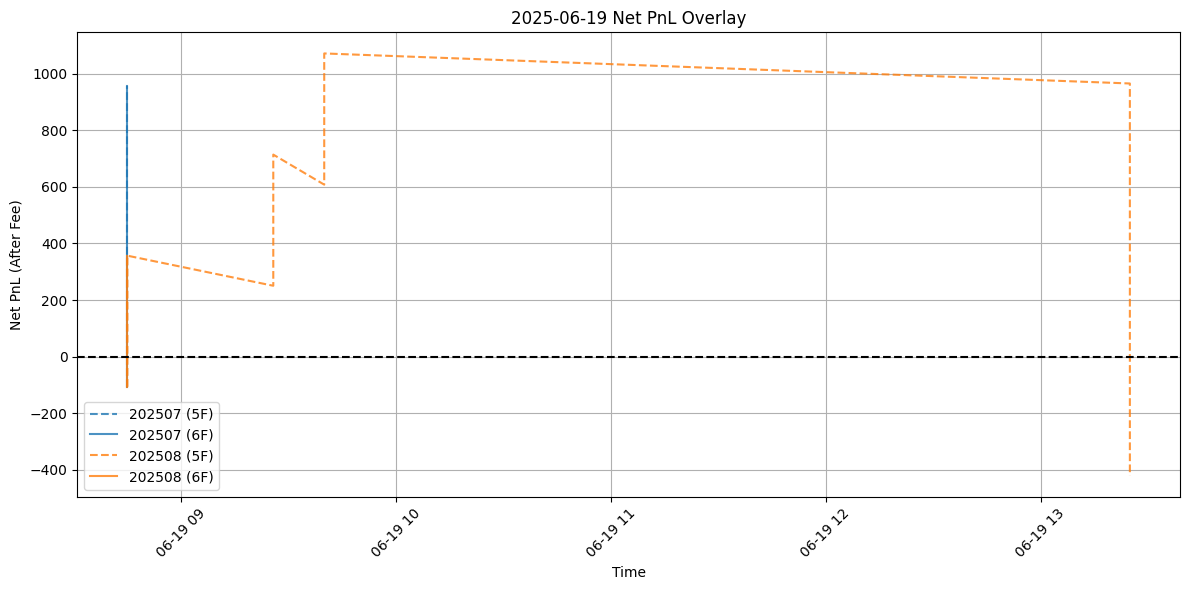

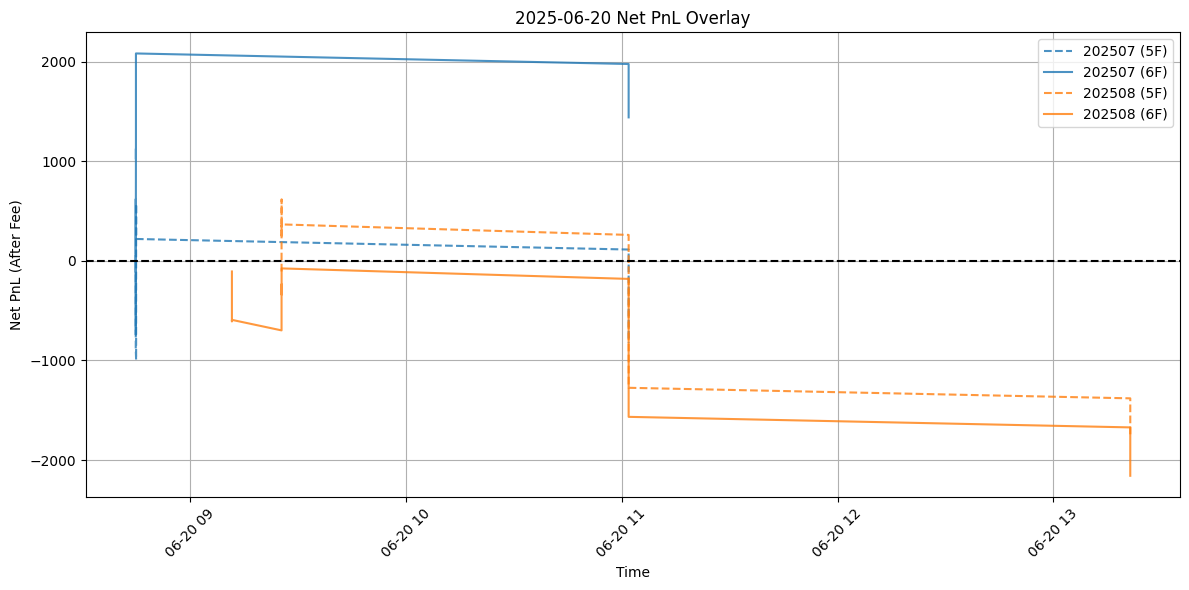

In [27]:
# analyzer.run_full_report()
# analyzer2.run_full_report()

# df = PnLAnalyzer.merge_analyzers_multiindex(analyzer, analyzer2, label1="5f", label2="6f")
PnLAnalyzer.plot_overlay_all_dates(
    analyzer, analyzer2,
    label1="5F", label2="6F"
)


In [10]:
import pandas as pd
df_all = pd.DataFrame({
    "5f": analyzer.get_daily_total_pnl(),
    "6f": analyzer2.get_daily_total_pnl(),
}).round(2)

df_all.loc["Total"] = df_all.sum().round(2)

In [12]:
df_all

,5f,6f
2025-06-02,NaN,698.24
2025-06-03,-1448.95,-1234.52
2025-06-04,-7697.46,-1557.68
2025-06-05,-1194.71,-3751.04
2025-06-06,-433.97,1159.00
2025-06-09,561.26,-1710.55
2025-06-10,24.27,3136.05
2025-06-11,101.61,NaN
2025-06-12,201.97,51.98
2025-06-13,-2294.90,-7971.96


In [13]:
# 原始轉換
df_reset = df.reset_index().pivot(index="date", columns="expiry")[["5f", "6f"]]
df_flat = df_reset.swaplevel(axis=1).sort_index(axis=1)

# 攤平欄位（例如 '202506_5f'）
df_flat.columns = [f"{e}_{s}" for e, s in df_flat.columns]

# 將 NaN 補為 0（避免空白）
df_flat = df_flat.fillna(0)

# 判斷每個合約的最後一欄（例如 202506_6f）作為分隔線位置
expiries = sorted(set(col.split("_")[0] for col in df_flat.columns))
separator_cols = [f"{e}_6f" for e in expiries if f"{e}_6f" in df_flat.columns]

# 建立分隔樣式
styles = [
    {
        "selector": f"th.col{i}",
        "props": [("border-right", "2px solid black")]
    }
    for i, col in enumerate(df_flat.columns)
    if col in separator_cols
]

# 展示美化表格
display(
    df_flat.style
        .format("{:,.2f}")
        # .set_caption("每日損益總覽（按月份分隔）")
        .set_table_styles(styles, overwrite=False)
)


,202506_5f,202506_6f,202507_5f,202507_6f,202508_5f,202508_6f,202509_5f,202509_6f
date,,,,,,,,
2025-06-02,0.00,"1,020.90",0.00,-322.66,0.00,0.00,0.00,0.00
2025-06-03,918.98,323.97,"-2,367.94","-1,558.49",0.00,0.00,0.00,0.00
2025-06-04,"-1,946.05",-289.52,"-5,751.41","-1,268.16",0.00,0.00,0.00,0.00
2025-06-05,"3,387.30",0.00,"-4,582.01","-3,751.04",0.00,0.00,0.00,0.00
2025-06-06,"2,036.71","2,579.48","-2,470.68","-1,420.47",0.00,0.00,0.00,0.00
2025-06-09,418.36,"-1,086.35",142.90,-624.20,0.00,0.00,0.00,0.00
2025-06-10,569.52,"2,430.70",-545.25,705.36,0.00,0.00,0.00,0.00
2025-06-11,101.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2025-06-12,201.97,51.98,0.00,0.00,0.00,0.00,0.00,0.00
